In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from umap import UMAP
import sys
sys.path.append('..')
from utils import load_pickle, save_pickle, seed_everything
seed_everything(42)

/home/sagawa/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
a = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_ord_test1/input_data.csv")
b = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_ord_test2/input_data.csv")
c = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_ord_test3/input_data.csv")
d = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_ord_test4/input_data.csv")
len(a), len(b), len(c), len(d)

(545276, 545276, 545276, 545276)

In [3]:
all(a == b), all(a == c), all(a == d)

(True, True, True)

In [2]:
target_embedding = np.load("/data1/ReactionT5_neword/task_yield/output_ord_test1/embedding_mean.npy")
print(target_embedding.shape)

(545276, 768)


In [3]:
sample_idx = np.random.choice(target_embedding.shape[0], 10000, replace=False)

In [4]:
# apply UMAP and plot
target_embedding = target_embedding[sample_idx]
umap = UMAP(n_components=2)
target_embedding_umap = umap.fit_transform(target_embedding)
print(target_embedding_umap.shape)

(10000, 2)


In [5]:
# save_pickle("/data1/ReactionT5_neword/task_yield/output_ord_test1/umap.pkl", umap)
# np.save("/data1/ReactionT5_neword/task_yield/output_ord_test1/embedding_umap.npy", target_embedding_umap)
target_embedding_umap = np.load("/data1/ReactionT5_neword/task_yield/output_ord_test1/embedding_umap.npy")

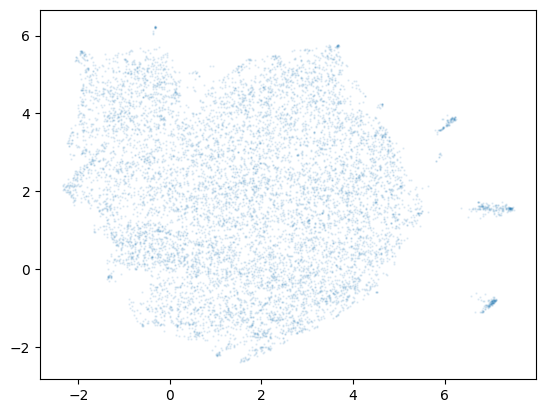

In [6]:
fig, ax = plt.subplots()
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.1, s=0.5)

(898, 2)


/tmp/ipykernel_383428/2196202197.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_383428/2196202197.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


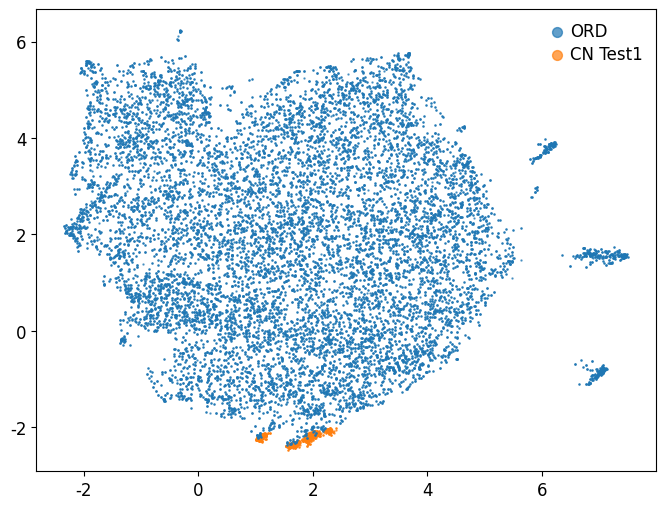

In [15]:
# query_embedding = np.load("/data1/ReactionT5_neword/task_yield/output_test1_test/embedding_mean.npy")
# print(query_embedding.shape)
# query_embedding_umap = umap.transform(query_embedding)
# np.save("/data1/ReactionT5_neword/task_yield/output_test1_test/query_embedding_umap.npy", query_embedding_umap)
query_embedding_umap = np.load("/data1/ReactionT5_neword/task_yield/output_test1_test/query_embedding_umap.npy")
print(query_embedding_umap.shape)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(0, 10000, 200):
    ax.scatter(target_embedding_umap[i:i+500, 0], target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, color="#1f77b4")
    ax.scatter(query_embedding_umap[i:i+500, 0], query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="CN Test1" if i == 0 else None, color="#ff7f0e")
# ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=0.5, label="ORD")
# ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=0.5, label="CN Test1")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

(900, 2)


/tmp/ipykernel_376749/846827639.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_376749/846827639.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


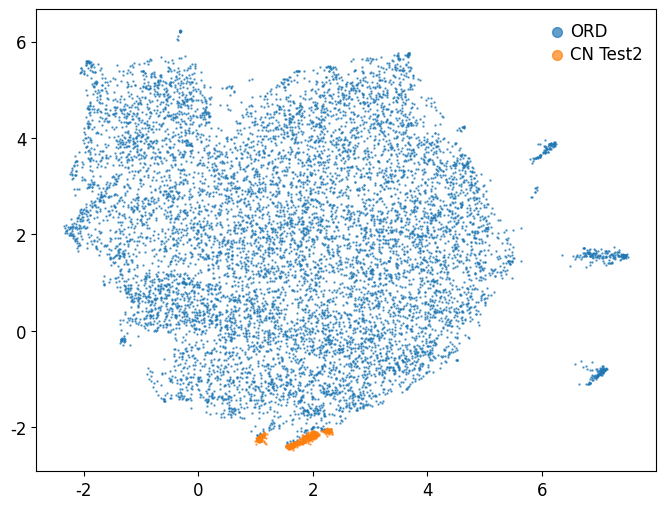

In [15]:
# query_embedding = np.load("/data1/ReactionT5_neword/task_yield/output_test2_test/embedding_mean.npy")
# print(query_embedding.shape)
# query_embedding_umap = umap.transform(query_embedding)
# np.save("/data1/ReactionT5_neword/task_yield/output_test2_test/query_embedding_umap.npy", query_embedding_umap)
query_embedding_umap = np.load("/data1/ReactionT5_neword/task_yield/output_test2_test/query_embedding_umap.npy")
print(query_embedding_umap.shape)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=0.5, label="ORD")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=0.5, label="CN Test2")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

(897, 2)


/tmp/ipykernel_376749/3584970892.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_376749/3584970892.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


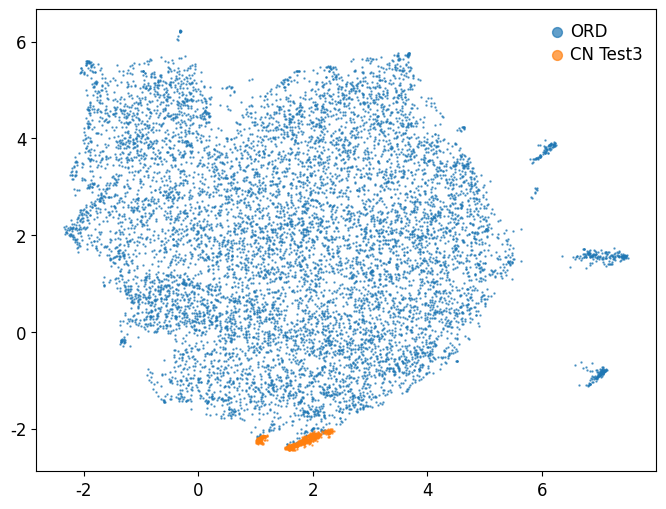

In [16]:
# query_embedding = np.load("/data1/ReactionT5_neword/task_yield/output_test3_test/embedding_mean.npy")
# print(query_embedding.shape)
# query_embedding_umap = umap.transform(query_embedding)
# np.save("/data1/ReactionT5_neword/task_yield/output_test3_test/query_embedding_umap.npy", query_embedding_umap)
query_embedding_umap = np.load("/data1/ReactionT5_neword/task_yield/output_test3_test/query_embedding_umap.npy")
print(query_embedding_umap.shape)


fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=0.5, label="ORD")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=0.5, label="CN Test3")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

(900, 2)


/tmp/ipykernel_376749/2183861529.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_376749/2183861529.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


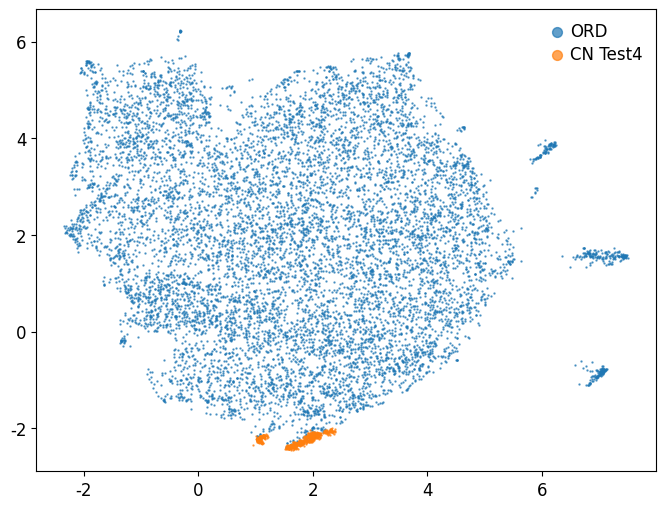

In [17]:
# query_embedding = np.load("/data1/ReactionT5_neword/task_yield/output_test4_test/embedding_mean.npy")
# print(query_embedding.shape)
# query_embedding_umap = umap.transform(query_embedding)
# np.save("/data1/ReactionT5_neword/task_yield/output_test4_test/query_embedding_umap.npy", query_embedding_umap)
query_embedding_umap = np.load("/data1/ReactionT5_neword/task_yield/output_test4_test/query_embedding_umap.npy")
print(query_embedding_umap.shape)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=0.5, label="ORD")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=0.5, label="CN Test4")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

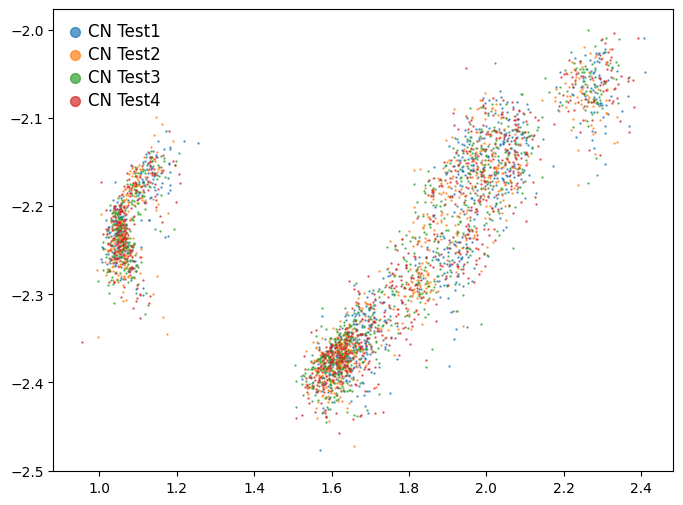

In [18]:
query_embedding_umap1 = np.load("/data1/ReactionT5_neword/task_yield/output_test1_test/query_embedding_umap.npy")
query_embedding_umap2 = np.load("/data1/ReactionT5_neword/task_yield/output_test2_test/query_embedding_umap.npy")
query_embedding_umap3 = np.load("/data1/ReactionT5_neword/task_yield/output_test3_test/query_embedding_umap.npy")
query_embedding_umap4 = np.load("/data1/ReactionT5_neword/task_yield/output_test4_test/query_embedding_umap.npy")
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(query_embedding_umap1[:, 0], query_embedding_umap1[:, 1], alpha=0.7, s=0.5, label="CN Test1")
ax.scatter(query_embedding_umap2[:, 0], query_embedding_umap2[:, 1], alpha=0.7, s=0.5, label="CN Test2")
ax.scatter(query_embedding_umap3[:, 0], query_embedding_umap3[:, 1], alpha=0.7, s=0.5, label="CN Test3")
ax.scatter(query_embedding_umap4[:, 0], query_embedding_umap4[:, 1], alpha=0.7, s=0.5, label="CN Test4")
# ax.set_xticklabels(fontsize=12)
# ax.set_yticklabels(fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper left',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

In [7]:
df_target = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_ord_test1/input_data.csv")
df_target = df_target.iloc[sample_idx].reset_index(drop=True)
df_query = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test1_test/input_data.csv")

NameError: name 'sample_idx' is not defined

In [ ]:
df_target["input"] = df_target["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace("PRODUCT:", ".").replace(". ", ""))
df_query["input"] = df_query["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace("PRODUCT:", ".").replace(". ", ""))

In [9]:
query_embedding_umap = np.load("/data1/ReactionT5_neword/task_yield/output_test1_test/query_embedding_umap.npy")

# calculate the molecular weight
from rdkit import Chem
from rdkit.Chem import Descriptors
# silence warning
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')
from transformers import AutoTokenizer 
tokenizer = AutoTokenizer.from_pretrained("sagawa/ReactionT5v2-yield")

for df in [df_target, df_query]:
    df["mol"] = df["input"].apply(Chem.MolFromSmiles)
    df["mw"] = df["mol"].apply(Descriptors.MolWt)
    df["logp"] = df["mol"].apply(Descriptors.MolLogP)
    df["hba"] = df["mol"].apply(Descriptors.NumHAcceptors)
    df["hbd"] = df["mol"].apply(Descriptors.NumHDonors)
    df["tpsa"] = df["mol"].apply(Descriptors.TPSA)
    df["rotb"] = df["mol"].apply(Descriptors.NumRotatableBonds)
    df["atoms"] = df["mol"].apply(Descriptors.HeavyAtomCount)
    df["rings"] = df["mol"].apply(Descriptors.RingCount)
    df["qed"] = df["mol"].apply(Descriptors.qed)
    df["input_len"] = df["input"].apply(lambda x: len(tokenizer(x)["input_ids"]))

/home/sagawa/miniconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [11]:
# for each feature, clip with 5% and 95% percentile
features = ["mw", "logp", "hba", "hbd", "tpsa", "rotb", "atoms", "rings", "qed", "input_len"]
for feature in features:
    lower = df_target[feature].quantile(0.05)
    upper = df_target[feature].quantile(0.95)
    df_target[feature] = df_target[feature].clip(lower, upper)
    lower = df_query[feature].quantile(0.05)
    upper = df_query[feature].quantile(0.95)
    df_query[feature] = df_query[feature].clip(lower, upper)

/tmp/ipykernel_377621/4201756385.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_377621/4201756385.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


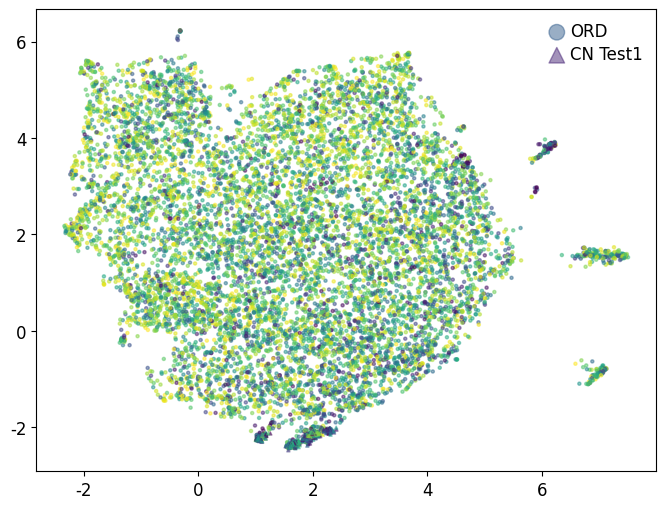

In [31]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["YIELD"].min(), df_query["YIELD"].min()), max(df_target["YIELD"].max(), df_query["YIELD"].max()))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["YIELD"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="CN Test1", c=cmap(norm(df_query["YIELD"])), marker="^")
# plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Yield")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_377621/1787810095.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_377621/1787810095.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


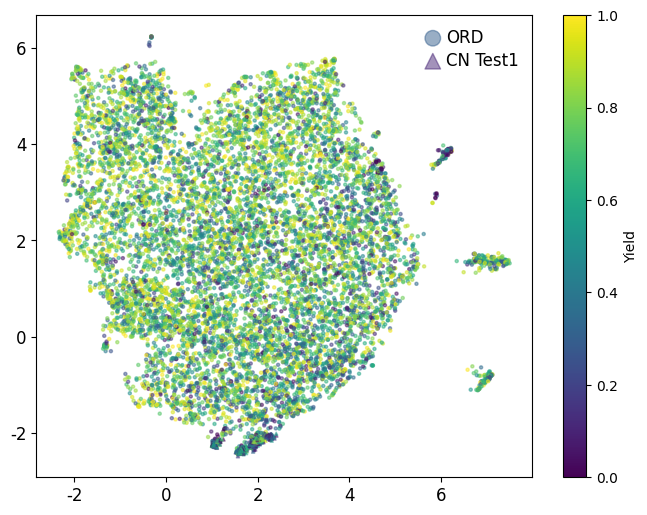

In [30]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["YIELD"].min(), df_query["YIELD"].min()), max(df_target["YIELD"].max(), df_query["YIELD"].max()))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["YIELD"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="CN Test1", c=cmap(norm(df_query["YIELD"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Yield")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_377621/3580241825.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_377621/3580241825.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


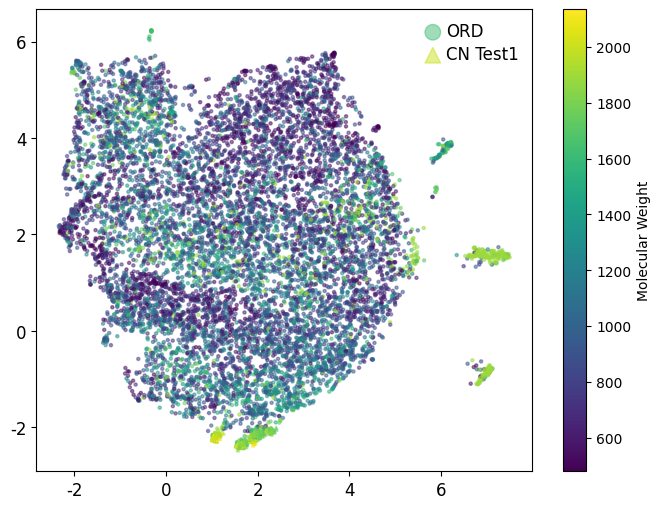

In [20]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["mw"].min(), df_query["mw"].min()), max(df_target["mw"].max(), df_query["mw"].max()))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["mw"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="CN Test1", c=cmap(norm(df_query["mw"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Molecular Weight")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_377621/98921224.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_377621/98921224.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


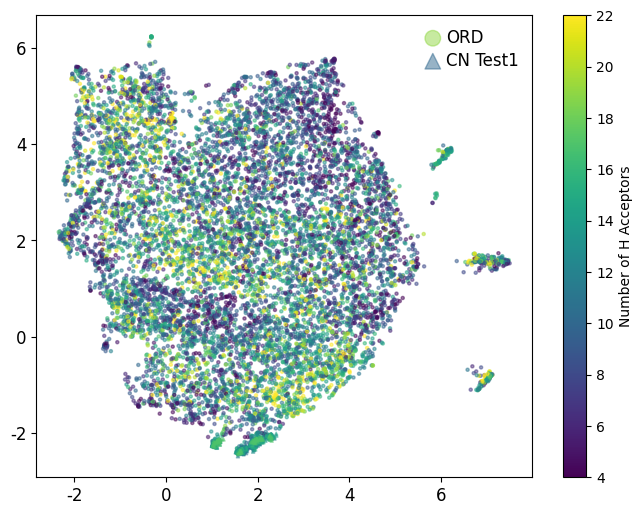

In [21]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["hba"].min(), df_query["hba"].min()), max(df_target["hba"].max(), df_query["hba"].max()))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["hba"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="CN Test1", c=cmap(norm(df_query["hba"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Number of H Acceptors")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_377621/3464207092.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_377621/3464207092.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


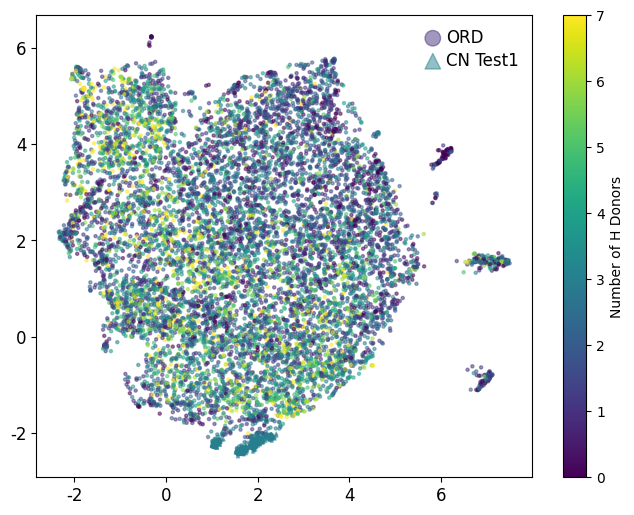

In [23]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["hbd"].min(), df_query["hbd"].min()), max(df_target["hbd"].max(), df_query["hbd"].max()))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["hbd"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="CN Test1", c=cmap(norm(df_query["hbd"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Number of H Donors")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_377621/2032209695.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_377621/2032209695.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


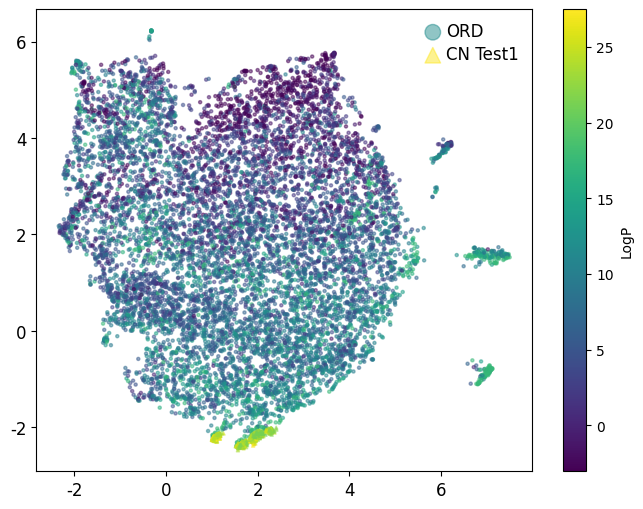

In [24]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["logp"].min(), df_query["logp"].min()), max(df_target["logp"].max(), df_query["logp"].max()))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["logp"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="CN Test1", c=cmap(norm(df_query["logp"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="LogP")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_377621/1685449465.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_377621/1685449465.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


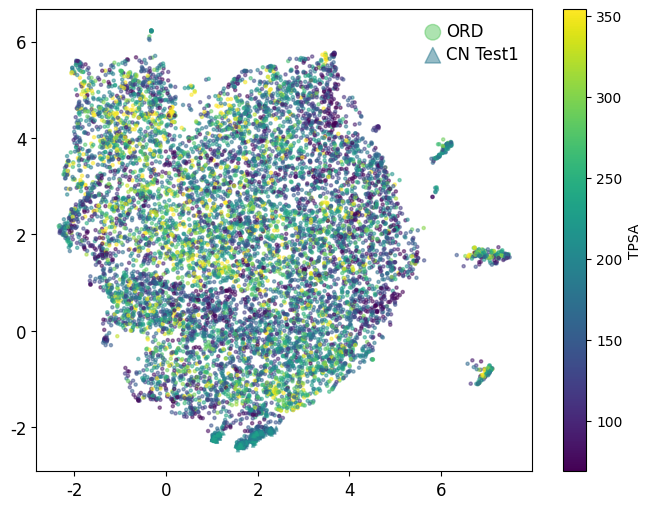

In [25]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["tpsa"].min(), df_query["tpsa"].min()), max(df_target["tpsa"].max(), df_query["tpsa"].max()))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["tpsa"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="CN Test1", c=cmap(norm(df_query["tpsa"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="TPSA")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_377621/2233849901.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_377621/2233849901.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


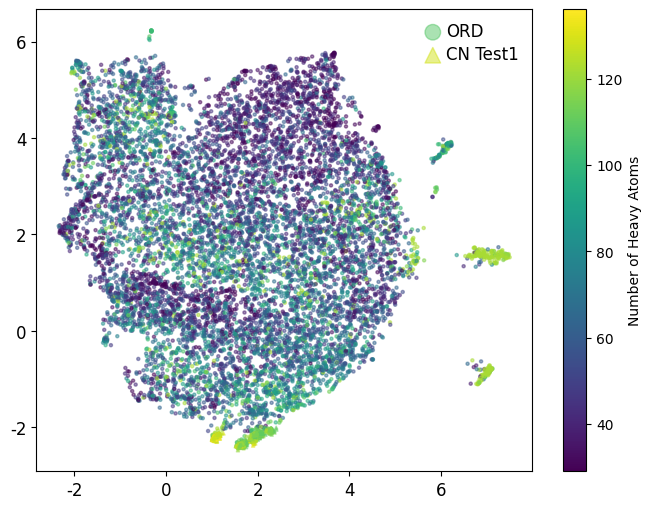

In [26]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["atoms"].min(), df_query["atoms"].min()), max(df_target["atoms"].max(), df_query["atoms"].max()))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["atoms"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="CN Test1", c=cmap(norm(df_query["atoms"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Number of Heavy Atoms")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_377621/1010118129.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_377621/1010118129.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


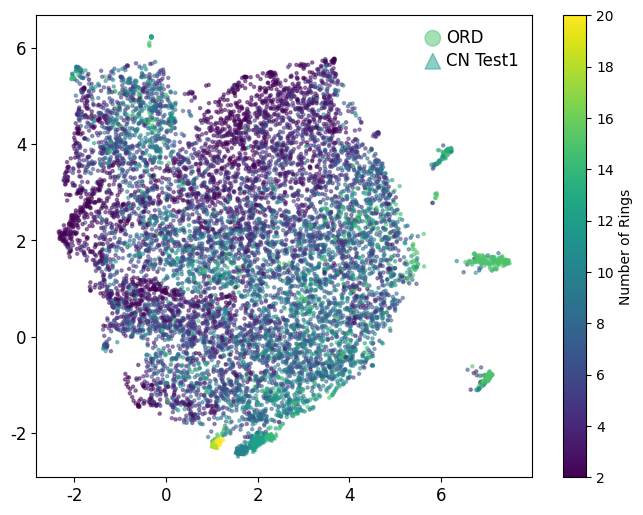

In [27]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["rings"].min(), df_query["rings"].min()), max(df_target["rings"].max(), df_query["rings"].max()))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["rings"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="CN Test1", c=cmap(norm(df_query["rings"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Number of Rings")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_377621/1321233949.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_377621/1321233949.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


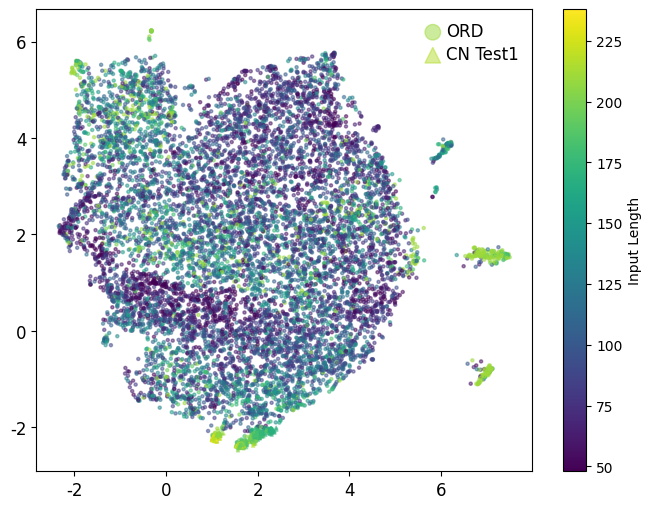

In [28]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["input_len"].min(), df_query["input_len"].min()), max(df_target["input_len"].max(), df_query["input_len"].max()))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["input_len"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="CN Test1", c=cmap(norm(df_query["input_len"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Input Length")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

check similar reaction and CN's target distributions

In [3]:
similar1 = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test1_test/top1_threshold-10_similar_reactions.csv")
cn1 = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test1_test/input_data.csv")

similar2 = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test2_test/top1_threshold-10_similar_reactions.csv")
cn2 = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test2_test/input_data.csv")
similar3 = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test3_test/top1_threshold-10_similar_reactions.csv")
cn3 = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test3_test/input_data.csv")
similar4 = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test4_test/top1_threshold-10_similar_reactions.csv")
cn4 = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test4_test/input_data.csv")

similar1

id  \
0    ord-d69cd4d7bfc34b96a8a337a81faf8099   
1    ord-0105e2e416204269a29755142760b48e   
2    ord-e01935eebcc4443d8586300bf4effeda   
3    ord-403b81823f254083a22d4088b3d44b07   
4    ord-fc073833c78d40ff89a9f01f106611c1   
..                                    ...   
810  ord-abd9c75b8e2c482d98e6ae3c7e3e1a5c   
811  ord-a6bba954e9924dd2bc14bdcf25909795   
812  ord-fd57f0a56eca4023b01a9cc237b27be4   
813  ord-11cea8ece2ec4729b1055660bea5b71d   
814  ord-0cdb12cbead24cf1a1c6a8d1f6b173e9   

                                              CATALYST  \
0    COc1ccc(OC)c(P(C23CC4CC(CC(C4)C2)C3)(C23CC4CC(...   
1    CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)(C2CCCCC...   
2    CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)(C(C)(C)...   
3    CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)(C(C)(C)...   
4    CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)(C(C)(C)...   
..                                                 ...   
810  CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)(C2CCCCC...   
811  COc1ccc(OC)c(P(C23CC4CC(CC(C4)C2)C3)(C23CC4CC(...   
812  CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)(C2CCCCC...   
813  CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)(C2CCCCC...   
814  COc1ccc(OC)c(P(C23CC4CC(CC(C4)C2)C3)(C23CC4CC(...   

                              REACTANT  \
0              Cc1ccc(N)cc1.Clc1cccnc1   
1          CCc1ccc(Br)cc1.Cc1ccc(N)cc1   
2              Cc1ccc(N)cc1.Clc1cccnc1   
3              Cc1ccc(N)cc1.Clc1ccccn1   
4    Cc1ccc(N)cc1.FC(F)(F)c1ccc(Cl)cc1   
..                                 ...   
810         COc1ccc(I)cc1.Cc1ccc(N)cc1   
811            Brc1cccnc1.Cc1ccc(N)cc1   
812        CCc1ccc(Br)cc1.Cc1ccc(N)cc1   
813        CCc1ccc(Br)cc1.Cc1ccc(N)cc1   
814            Cc1ccc(N)cc1.Clc1cccnc1   

                                               REAGENT  \
0    CCN=P(N=P(N(C)C)(N(C)C)N(C)C)(N(C)C)N(C)C.COc1...   
1    CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)(C2CCCCC...   
2    CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)(C(C)(C)...   
3    CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)(C(C)(C)...   
4    CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)(C(C)(C)...   
..                                                 ...   
810  CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)(C2CCCCC...   
811  CN1CCCN2CCCN=C12.COc1ccc(OC)c(P(C23CC4CC(CC(C4...   
812  CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)(C2CCCCC...   
813  CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)(C2CCCCC...   
814  CN1CCCN2CCCN=C12.COC(=O)c1cc(-c2cccs2)on1.COc1...   

                                     SOLVENT  INTERNAL_STANDARD  NoData  \
0    CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
1    CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
2    CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
3    CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
4    CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
..                                       ...                ...     ...   
810  CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
811  CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
812  CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
813  CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
814  CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   

                            PRODUCT  YIELD  TEMP  \
0              Cc1ccc(Nc2cccnc2)cc1   0.09  60.0   
1          CCc1ccc(Nc2ccc(C)cc2)cc1   0.52  60.0   
2              Cc1ccc(Nc2cccnc2)cc1   0.34  60.0   
3              Cc1ccc(Nc2ccccn2)cc1   0.80  60.0   
4    Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1   0.12  60.0   
..                              ...    ...   ...   
810        COc1ccc(Nc2ccc(C)cc2)cc1   0.14  60.0   
811            Cc1ccc(Nc2cccnc2)cc1   0.86  60.0   
812        CCc1ccc(Nc2ccc(C)cc2)cc1   0.00  60.0   
813        CCc1ccc(Nc2ccc(C)cc2)cc1   0.15  60.0   
814            Cc1ccc(Nc2cccnc2)cc1   0.01  60.0   

                                                 input  
0    REACTANT:Cc

In [4]:
len(similar1), len(similar2), len(similar3), len(similar4), len(cn1), len(cn2), len(cn3), len(cn4)

(815, 812, 811, 641, 898, 900, 897, 900)

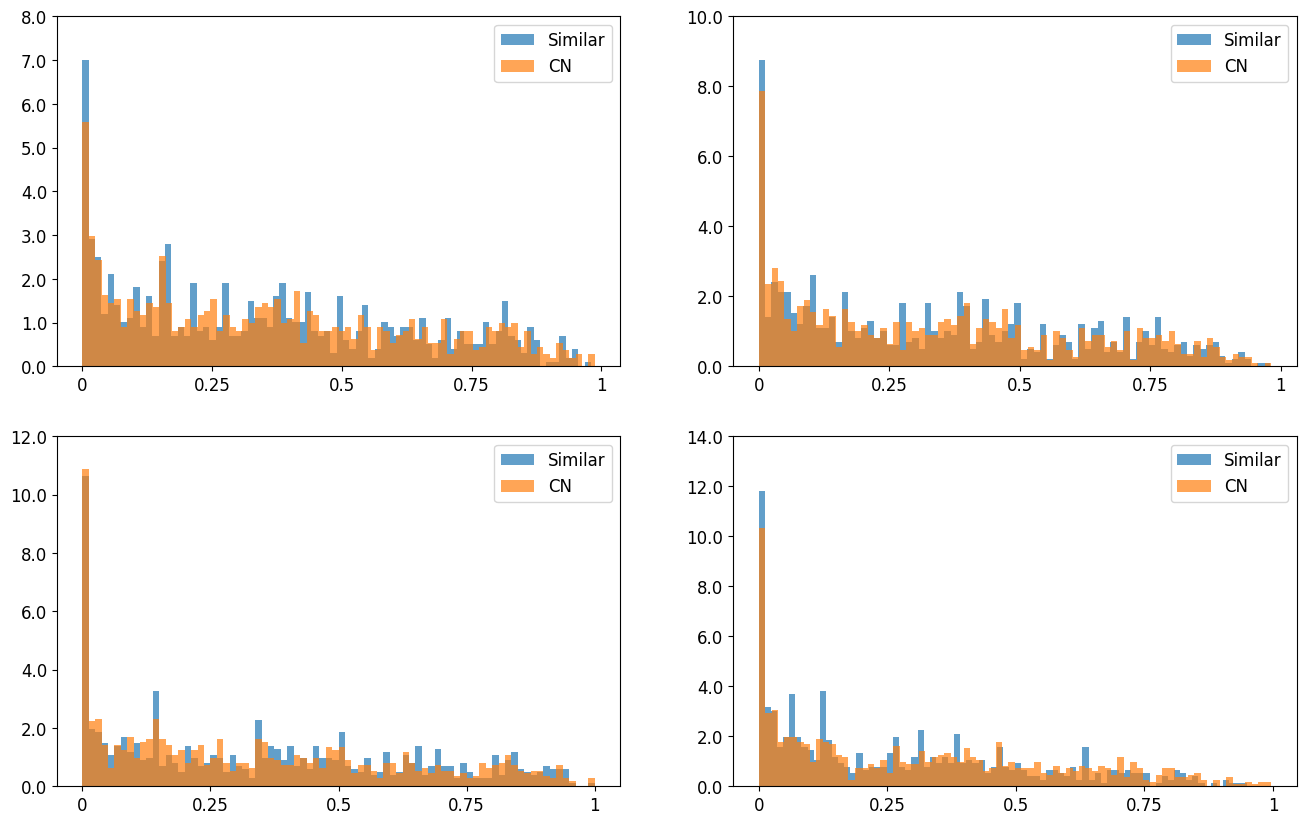

In [7]:
# create 4x4 grid and plot histgram
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
for i, (similar, cn) in enumerate(zip([similar1, similar2, similar3, similar4], [cn1, cn2, cn3, cn4])):
    # density plot
    axs[i//2][i%2].hist(similar["YIELD"], bins=80, alpha=0.7, label="Similar", density=True)
    axs[i//2][i%2].hist(cn["YIELD"], bins=80, alpha=0.7, label="CN", density=True)
    # axs[i//2][i%2].set_title(f"Test{i+1}")
    axs[i//2][i%2].legend(fontsize=12)
    axs[i//2][i%2].set_xticks([0, 0.25, 0.5, 0.75, 1])
    axs[i//2][i%2].set_xticklabels([0, 0.25, 0.5, 0.75, 1], fontsize=12)
    axs[i//2][i%2].set_yticks(axs[i//2][i%2].get_yticks())
    axs[i//2][i%2].set_yticklabels(axs[i//2][i%2].get_yticks(), fontsize=12)
    # axs[i//2][i%2].set_xlabel("Yield", fontsize=12)
    # axs[i//2][i%2].set_ylabel("Density", fontsize=12)
# plt.tight_layout()

# visualize distance

/tmp/ipykernel_3436610/733759275.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i:.4f}" for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_3436610/733759275.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


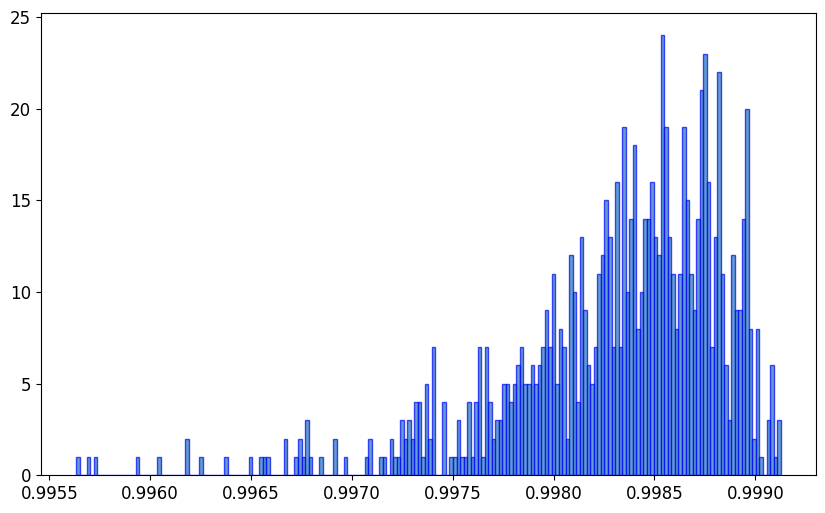

In [92]:
distance = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test1_test/distance.csv")
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
distance["distance"].hist(bins=200, ax=ax, edgecolor="b", alpha=0.7)
# ax.set_xticks(np.arange(0.5, 1.05, 0.1))
ax.set_xticklabels([f"{i:.4f}" for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.grid(axis="y", alpha=0)
ax.grid(axis="x", alpha=0)

/tmp/ipykernel_3436610/2361576052.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i:.4f}" for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_3436610/2361576052.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


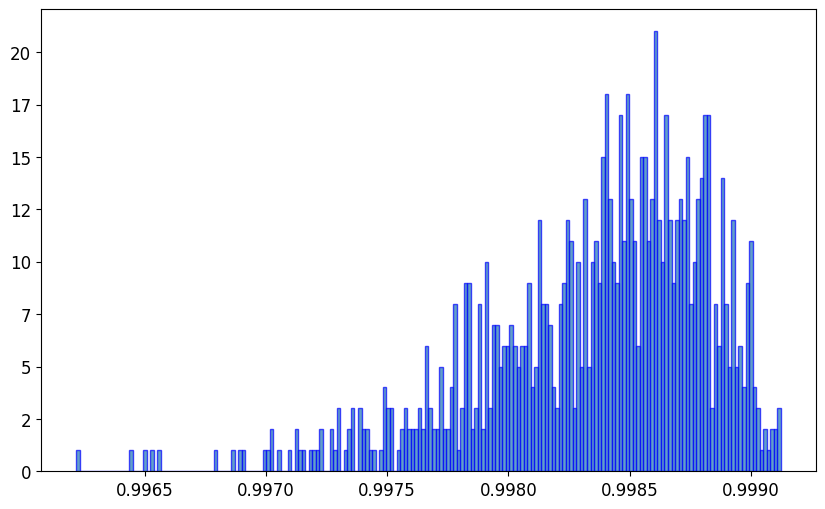

In [93]:
distance = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test2_test/distance.csv")
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
distance["distance"].hist(bins=200, ax=ax, edgecolor="b", alpha=0.7)
# ax.set_xticks(np.arange(0.5, 1.05, 0.1))
ax.set_xticklabels([f"{i:.4f}" for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.grid(axis="y", alpha=0)
ax.grid(axis="x", alpha=0)

/tmp/ipykernel_3436610/2906851594.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i:.4f}" for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_3436610/2906851594.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


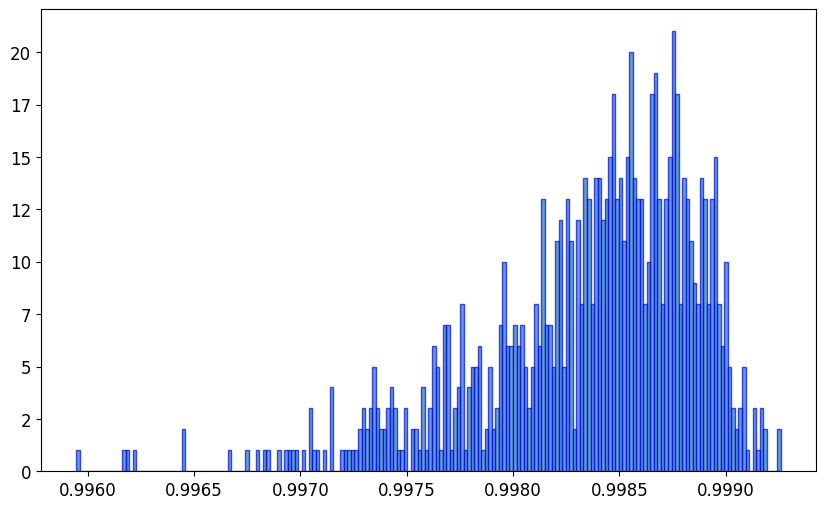

In [94]:
distance = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test3_test/distance.csv")
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
distance["distance"].hist(bins=200, ax=ax, edgecolor="b", alpha=0.7)
# ax.set_xticks(np.arange(0.5, 1.05, 0.1))
ax.set_xticklabels([f"{i:.4f}" for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.grid(axis="y", alpha=0)
ax.grid(axis="x", alpha=0)

/tmp/ipykernel_3436610/963253772.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i:.4f}" for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_3436610/963253772.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


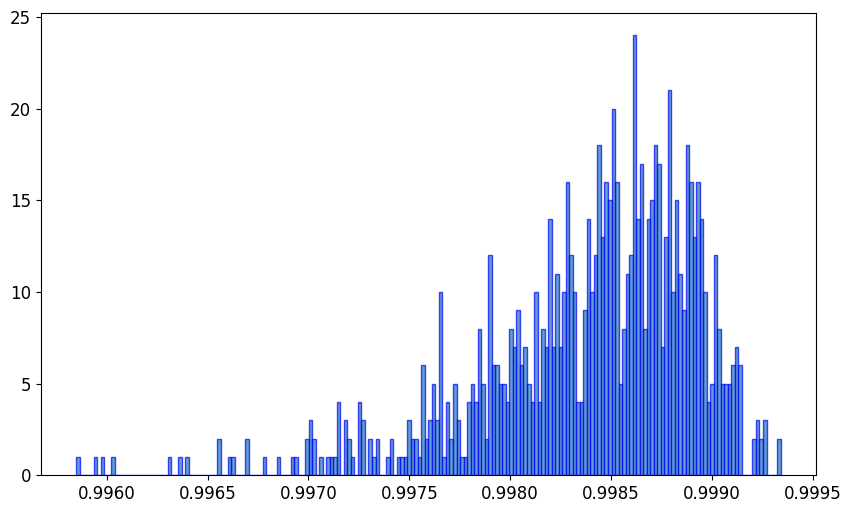

In [95]:
distance = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test4_test/distance.csv")
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
distance["distance"].hist(bins=200, ax=ax, edgecolor="b", alpha=0.7)
# ax.set_xticks(np.arange(0.5, 1.05, 0.1))
ax.set_xticklabels([f"{i:.4f}" for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.grid(axis="y", alpha=0)
ax.grid(axis="x", alpha=0)

In [7]:
a = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_ord_test1/input_data.csv")
b = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test1_test/input_data.csv")
len(set(a["input"]) & set(b["input"]))

0

In [9]:
len(set(a["input"])), len(set(b["input"])), len(set(a["input"]) | set(b["input"]))

(352457, 898, 353355)

In [97]:
import pandas as pd
df = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test1_test/top1_threshold-10_similar_reactions.csv")
df

id  \
0    ord-d69cd4d7bfc34b96a8a337a81faf8099   
1    ord-0105e2e416204269a29755142760b48e   
2    ord-e01935eebcc4443d8586300bf4effeda   
3    ord-403b81823f254083a22d4088b3d44b07   
4    ord-fc073833c78d40ff89a9f01f106611c1   
..                                    ...   
810  ord-abd9c75b8e2c482d98e6ae3c7e3e1a5c   
811  ord-a6bba954e9924dd2bc14bdcf25909795   
812  ord-fd57f0a56eca4023b01a9cc237b27be4   
813  ord-11cea8ece2ec4729b1055660bea5b71d   
814  ord-0cdb12cbead24cf1a1c6a8d1f6b173e9   

                                              CATALYST  \
0    COc1ccc(OC)c(P(C23CC4CC(CC(C4)C2)C3)(C23CC4CC(...   
1    CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)(C2CCCCC...   
2    CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)(C(C)(C)...   
3    CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)(C(C)(C)...   
4    CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)(C(C)(C)...   
..                                                 ...   
810  CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)(C2CCCCC...   
811  COc1ccc(OC)c(P(C23CC4CC(CC(C4)C2)C3)(C23CC4CC(...   
812  CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)(C2CCCCC...   
813  CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)(C2CCCCC...   
814  COc1ccc(OC)c(P(C23CC4CC(CC(C4)C2)C3)(C23CC4CC(...   

                              REACTANT  \
0              Cc1ccc(N)cc1.Clc1cccnc1   
1          CCc1ccc(Br)cc1.Cc1ccc(N)cc1   
2              Cc1ccc(N)cc1.Clc1cccnc1   
3              Cc1ccc(N)cc1.Clc1ccccn1   
4    Cc1ccc(N)cc1.FC(F)(F)c1ccc(Cl)cc1   
..                                 ...   
810         COc1ccc(I)cc1.Cc1ccc(N)cc1   
811            Brc1cccnc1.Cc1ccc(N)cc1   
812        CCc1ccc(Br)cc1.Cc1ccc(N)cc1   
813        CCc1ccc(Br)cc1.Cc1ccc(N)cc1   
814            Cc1ccc(N)cc1.Clc1cccnc1   

                                               REAGENT  \
0    CCN=P(N=P(N(C)C)(N(C)C)N(C)C)(N(C)C)N(C)C.COc1...   
1    CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)(C2CCCCC...   
2    CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)(C(C)(C)...   
3    CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)(C(C)(C)...   
4    CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)(C(C)(C)...   
..                                                 ...   
810  CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)(C2CCCCC...   
811  CN1CCCN2CCCN=C12.COc1ccc(OC)c(P(C23CC4CC(CC(C4...   
812  CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)(C2CCCCC...   
813  CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)(C2CCCCC...   
814  CN1CCCN2CCCN=C12.COC(=O)c1cc(-c2cccs2)on1.COc1...   

                                     SOLVENT  INTERNAL_STANDARD  NoData  \
0    CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
1    CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
2    CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
3    CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
4    CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
..                                       ...                ...     ...   
810  CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
811  CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
812  CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
813  CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   
814  CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O.CS(C)=O                NaN     NaN   

                            PRODUCT  YIELD  TEMP  \
0              Cc1ccc(Nc2cccnc2)cc1   0.09  60.0   
1          CCc1ccc(Nc2ccc(C)cc2)cc1   0.52  60.0   
2              Cc1ccc(Nc2cccnc2)cc1   0.34  60.0   
3              Cc1ccc(Nc2ccccn2)cc1   0.80  60.0   
4    Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1   0.12  60.0   
..                              ...    ...   ...   
810        COc1ccc(Nc2ccc(C)cc2)cc1   0.14  60.0   
811            Cc1ccc(Nc2cccnc2)cc1   0.86  60.0   
812        CCc1ccc(Nc2ccc(C)cc2)cc1   0.00  60.0   
813        CCc1ccc(Nc2ccc(C)cc2)cc1   0.15  60.0   
814            Cc1ccc(Nc2cccnc2)cc1   0.01  60.0   

                                                 input  
0    REACTANT:Cc

In [98]:
len(df["id"].unique()), len(pd.read_csv("/data1/ReactionT5_neword/data/C_N_yield/MFF_Test1/test.csv"))

(815, 898)

In [16]:
target_embedding = np.load("/data1/ReactionT5_neword/task_yield/output_ord_test1/embedding_mean.npy")
umap = UMAP(n_components=2)
target_embedding_umap = umap.fit_transform(target_embedding)
save_pickle("/data1/ReactionT5_neword/task_yield/output_ord_test1/umap_full.pkl", umap)
np.save("/data1/ReactionT5_neword/task_yield/output_ord_test1/embedding_umap_full.npy", target_embedding_umap)
query_embedding = np.load("/data1/ReactionT5_neword/task_yield/output_test1_test/embedding_mean.npy")
query_embedding_umap = umap.transform(query_embedding)
np.save("/data1/ReactionT5_neword/task_yield/output_test1_test/query_embedding_umap_full.npy", query_embedding_umap)

/home/sagawa/miniconda3/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/sagawa/miniconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


/tmp/ipykernel_385601/1119865929.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_385601/1119865929.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


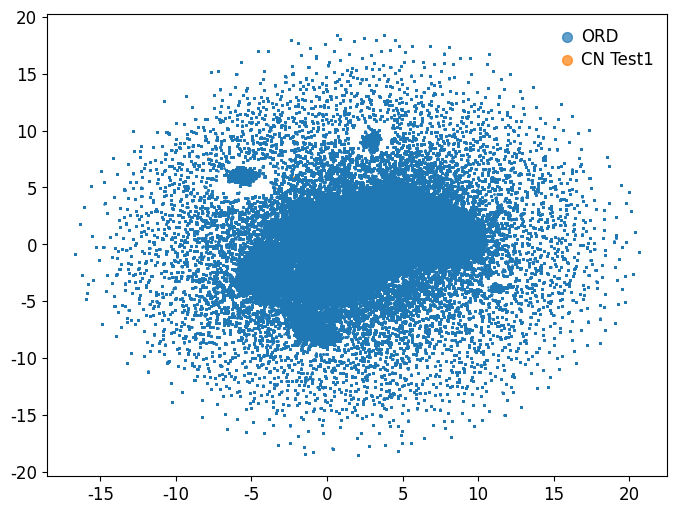

In [5]:
target_embedding_umap = np.load("/data1/ReactionT5_neword/task_yield/output_ord_test1/embedding_umap_full.npy")
query_embedding_umap = np.load("/data1/ReactionT5_neword/task_yield/output_test1_test/query_embedding_umap_full.npy")

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(0, len(target_embedding_umap), 200):
    ax.scatter(target_embedding_umap[i:i+500, 0], target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, color="#1f77b4")
    ax.scatter(query_embedding_umap[i:i+500, 0], query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="CN Test1" if i == 0 else None, color="#ff7f0e")
# ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=0.5, label="ORD")
# ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=0.5, label="CN Test1")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

In [6]:
df_target = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_ord_test1/input_data.csv")
df_query = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test1_test/input_data.csv")
df_target["input"] = df_target["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace("PRODUCT:", ".").replace(". ", ""))
df_query["input"] = df_query["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace("PRODUCT:", ".").replace(". ", ""))

In [4]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
# silence warning
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')

target_fp = []
query_fp = []
for smiles in df_target["input"]:
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
    target_fp.append(fp)
for smiles in df_query["input"]:
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
    query_fp.append(fp)

In [8]:
from rdkit import DataStructs
similarity_score = [[0 for __ in range(len(target_fp))] for _ in range(len(query_fp))]
for i, query in enumerate(query_fp):
    for j, target in enumerate(target_fp):
        similarity_score[i][j] = DataStructs.TanimotoSimilarity(query, target)

In [10]:
similarity_score = np.array(similarity_score)
np.save("/data1/ReactionT5_neword/task_yield/output_test1_test/similarity_score_morgan_tanimoto.npy", similarity_score)

In [5]:
similarity_score = np.load("/data1/ReactionT5_neword/task_yield/output_test1_test/similarity_score_morgan_tanimoto.npy")
similar_reactions = []
for i in range(len(similarity_score)):
    idx = np.argmax(similarity_score[i])
    similar_reactions.append(idx)
similar_reactions = np.array(similar_reactions)
np.save("/data1/ReactionT5_neword/task_yield/output_test1_test/similar_reactions_index_morgan_tanimoto.npy", similar_reactions)

get the index of most similar reaction based on the UMAP embedding

In [3]:
target_embedding_umap = np.load("/data1/ReactionT5_neword/task_yield/output_ord_test1/embedding_umap_full.npy")
query_embedding_umap = np.load("/data1/ReactionT5_neword/task_yield/output_test1_test/query_embedding_umap_full.npy")
similar_reactions = []
for i in range(len(query_embedding_umap)):
    mse_distance = []
    for j in range(len(target_embedding_umap)):
        mse_distance.append(np.linalg.norm(query_embedding_umap[i] - target_embedding_umap[j]))
    similar_reactions.append(np.argmin(mse_distance))

similar_reactions = np.array(similar_reactions)
np.save("/data1/ReactionT5_neword/task_yield/output_test1_test/similar_reactions_index_ReactionT5.npy", similar_reactions)

calculate R2 score

In [27]:
similar_reactions = np.load("/data1/ReactionT5_neword/task_yield/output_test1_test/similar_reactions_index_morgan_tanimoto.npy")
df_similar = df_target.iloc[similar_reactions].reset_index(drop=True)
print(len(df_similar), len(df_query))
r2_score(df_similar["YIELD"], df_query["YIELD"]), mean_squared_error(df_similar["YIELD"], df_query["YIELD"], squared=False)

898 898


/home/sagawa/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.8305783606327232, 0.11233066584147548)

/tmp/ipykernel_396282/2615417011.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i:.1f}" for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_396282/2615417011.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{i:.1f}" for i in ax.get_yticks()], fontsize=12)


[Text(0, -0.2, '-0.2'),
 Text(0, 0.0, '0.0'),
 Text(0, 0.2, '0.2'),
 Text(0, 0.4000000000000001, '0.4'),
 Text(0, 0.6000000000000001, '0.6'),
 Text(0, 0.8, '0.8'),
 Text(0, 1.0000000000000002, '1.0'),
 Text(0, 1.2000000000000002, '1.2')]

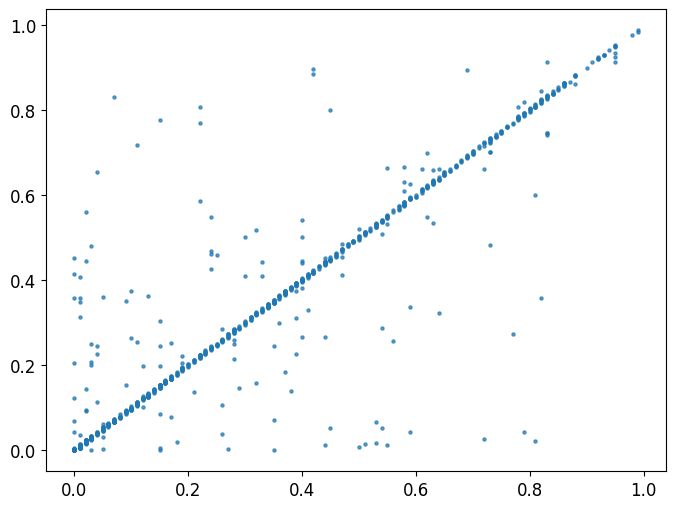

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(df_similar["YIELD"], df_query["YIELD"], alpha=0.7, s=5)
ax.set_xticklabels([f"{i:.1f}" for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([f"{i:.1f}" for i in ax.get_yticks()], fontsize=12)

In [31]:
similar_reactions = np.load("/data1/ReactionT5_neword/task_yield/output_test1_test/similar_reactions_index_ReactionT5.npy")
df_similar = df_target.iloc[similar_reactions].reset_index(drop=True)
print(len(df_similar), len(df_query))
r2_score(df_similar["YIELD"], df_query["YIELD"]), mean_squared_error(df_similar["YIELD"], df_query["YIELD"], squared=False)

898 898


/home/sagawa/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(-0.2734493451593898, 0.3189614856486618)

/tmp/ipykernel_396282/2748337034.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i:.1f}" for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_396282/2748337034.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{i:.1f}" for i in ax.get_yticks()], fontsize=12)


[Text(0, -0.2, '-0.2'),
 Text(0, 0.0, '0.0'),
 Text(0, 0.2, '0.2'),
 Text(0, 0.4000000000000001, '0.4'),
 Text(0, 0.6000000000000001, '0.6'),
 Text(0, 0.8, '0.8'),
 Text(0, 1.0000000000000002, '1.0'),
 Text(0, 1.2000000000000002, '1.2')]

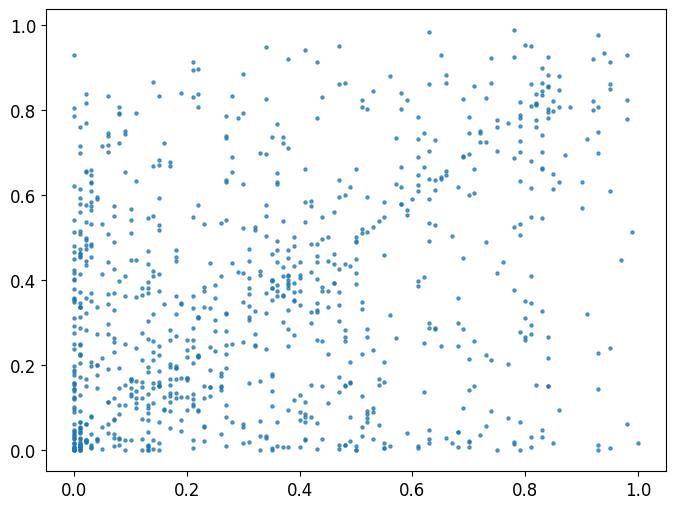

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(df_similar["YIELD"], df_query["YIELD"], alpha=0.7, s=5)
ax.set_xticklabels([f"{i:.1f}" for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([f"{i:.1f}" for i in ax.get_yticks()], fontsize=12)

calculate levenshtein distance

In [18]:
import Levenshtein
similar_reactions = np.load("/data1/ReactionT5_neword/task_yield/output_test1_test/similar_reactions_index_morgan_tanimoto.npy")
df_similar = df_target.iloc[similar_reactions].reset_index(drop=True)
print(len(df_similar), len(df_query))

898 898


(array([415.,  37.,  56.,  11.,  48.,  82.,  23.,   9.,   3.,  32.,   7.,
          3.,   4.,  45.,  23.,  14.,  11.,   0.,  10.,  15.,   7.,   0.,
          4.,   3.,   2.,   1.,   4.,   0.,   2.,   1.,   1.,   1.,   0.,
          3.,   3.,   2.,   1.,   0.,   1.,   1.,   0.,   2.,   0.,   1.,
          0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          1.]),
 array([  8.  ,   9.92,  11.84,  13.76,  15.68,  17.6 ,  19.52,  21.44,
         23.36,  25.28,  27.2 ,  29.12,  31.04,  32.96,  34.88,  36.8 ,
         38.72,  40.64,  42.56,  44.48,  46.4 ,  48.32,  50.24,  52.16,
         54.08,  56.  ,  57.92,  59.84,  61.76,  63.68,  65.6 ,  67.52,
         69.44,  71.36,  73.28

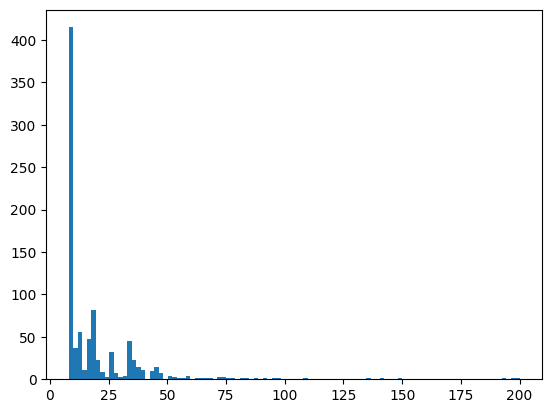

In [43]:
distances = []
for i in range(len(df_query)):
    distances.append(Levenshtein.distance(df_query["input"][i], df_similar["input"][i]))
distances = np.array(distances)
plt.hist(distances, bins=100)

898 898


(array([133.,  72.,  36.,  78.,  71.,  88.,  59.,  40.,  26.,  25.,  15.,
         11.,   9.,  13.,  44.,  23.,  24.,  22.,  10.,  12.,  18.,  13.,
          3.,   3.,   1.,   5.,   0.,   3.,   0.,   3.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   2.,   1.,   0.,   1.,   1.,   5.,   2.,
          3.,   2.,   3.,   5.,   0.,   0.,   0.,   2.,   1.,   2.,   1.,
          0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  8.  ,  10.14,  12.28,  14.42,  16.56,  18.7 ,  20.84,  22.98,
         25.12,  27.26,  29.4 ,  31.54,  33.68,  35.82,  37.96,  40.1 ,
         42.24,  44.38,  46.52,  48.66,  50.8 ,  52.94,  55.08,  57.22,
         59.36,  61.5 ,  63.64,  65.78,  67.92,  70.06,  72.2 ,  74.34,
         76.48,  78.62,  80.76

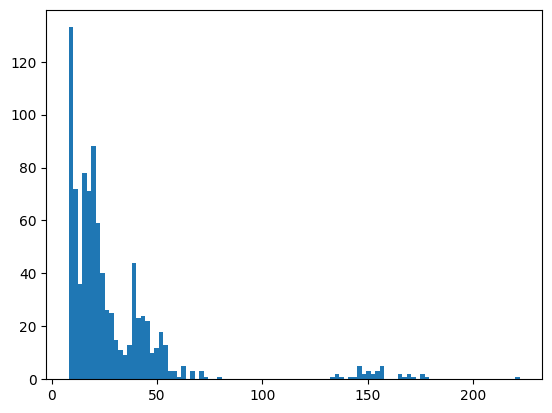

In [14]:
similar_reactions = np.load("/data1/ReactionT5_neword/task_yield/output_test1_test/similar_reactions_index_ReactionT5.npy")
df_similar = df_target.iloc[similar_reactions].reset_index(drop=True)
print(len(df_similar), len(df_query))
distances = []
for i in range(len(df_query)):
    distances.append(Levenshtein.distance(df_query["input"][i], df_similar["input"][i]))
distances = np.array(distances)
plt.hist(distances, bins=100)

<!--  -->

# Use v2's embedding

In [33]:
target_embedding = np.load("/data1/ReactionT5_neword/task_yield/output_ord_test1/embedding_mean_v2.npy")
umap = UMAP(n_components=2)
target_embedding_umap = umap.fit_transform(target_embedding)
save_pickle("/data1/ReactionT5_neword/task_yield/output_ord_test1/umap_full_v2.pkl", umap)
np.save("/data1/ReactionT5_neword/task_yield/output_ord_test1/embedding_umap_full_v2.npy", target_embedding_umap)
query_embedding = np.load("/data1/ReactionT5_neword/task_yield/output_test1_test/embedding_mean_v2.npy")
query_embedding_umap = umap.transform(query_embedding)
np.save("/data1/ReactionT5_neword/task_yield/output_test1_test/query_embedding_umap_full_v2.npy", query_embedding_umap)

/home/sagawa/miniconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


/tmp/ipykernel_396282/271334500.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_396282/271334500.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


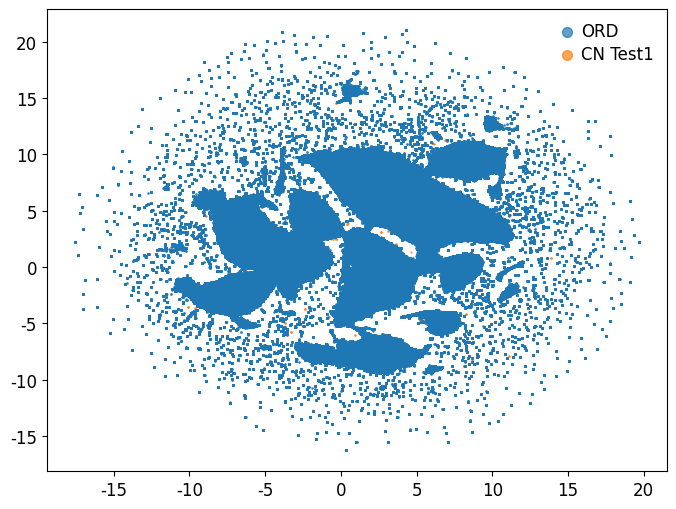

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(0, len(target_embedding_umap), 200):
    ax.scatter(target_embedding_umap[i:i+500, 0], target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, color="#1f77b4")
    ax.scatter(query_embedding_umap[i:i+500, 0], query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="CN Test1" if i == 0 else None, color="#ff7f0e")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

In [35]:
target_embedding_umap = np.load("/data1/ReactionT5_neword/task_yield/output_ord_test1/embedding_umap_full_v2.npy")
query_embedding_umap = np.load("/data1/ReactionT5_neword/task_yield/output_test1_test/query_embedding_umap_full_v2.npy")
similar_reactions = []
for i in range(len(query_embedding_umap)):
    mse_distance = []
    for j in range(len(target_embedding_umap)):
        mse_distance.append(np.linalg.norm(query_embedding_umap[i] - target_embedding_umap[j]))
    similar_reactions.append(np.argmin(mse_distance))

similar_reactions = np.array(similar_reactions)
np.save("/data1/ReactionT5_neword/task_yield/output_test1_test/similar_reactions_index_ReactionT5_v2.npy", similar_reactions)

In [36]:
df_similar = df_target.iloc[similar_reactions].reset_index(drop=True)
print(len(df_similar), len(df_query))
r2_score(df_similar["YIELD"], df_query["YIELD"]), mean_squared_error(df_similar["YIELD"], df_query["YIELD"], squared=False)

898 898


/home/sagawa/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.4522031895271147, 0.21362484232358495)

/tmp/ipykernel_396282/2748337034.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i:.1f}" for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_396282/2748337034.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{i:.1f}" for i in ax.get_yticks()], fontsize=12)


[Text(0, -0.2, '-0.2'),
 Text(0, 0.0, '0.0'),
 Text(0, 0.2, '0.2'),
 Text(0, 0.4000000000000001, '0.4'),
 Text(0, 0.6000000000000001, '0.6'),
 Text(0, 0.8, '0.8'),
 Text(0, 1.0000000000000002, '1.0'),
 Text(0, 1.2000000000000002, '1.2')]

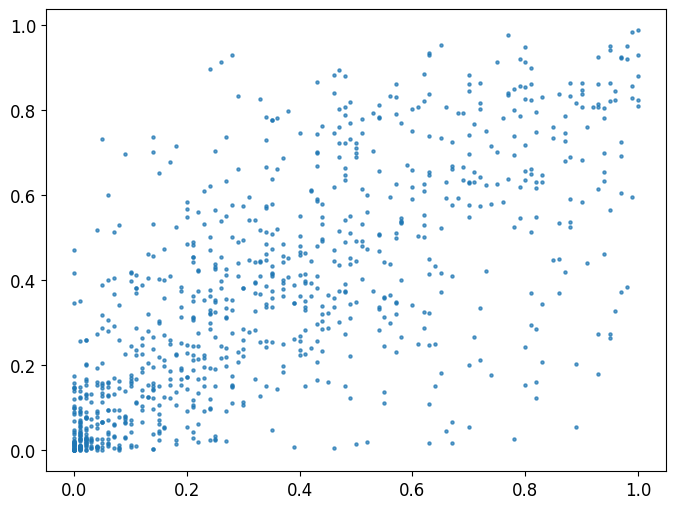

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(df_similar["YIELD"], df_query["YIELD"], alpha=0.7, s=5)
ax.set_xticklabels([f"{i:.1f}" for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([f"{i:.1f}" for i in ax.get_yticks()], fontsize=12)

umapを介さずに類似度計算

In [39]:
import torch
target_embedding = torch.tensor(target_embedding, dtype=torch.float32).cuda()
query_embedding = torch.tensor(query_embedding, dtype=torch.float32).cuda()

embedding = torch.nn.functional.normalize(target_embedding, p=2, dim=1)
query_embedding = torch.nn.functional.normalize(query_embedding, p=2, dim=1)

batch_size = 1000
nearest_samples = []
similarities = []

for i in range(0, query_embedding.shape[0], batch_size):
    print(f"Processing batch {i//batch_size}...")
    batch = query_embedding[i: i + batch_size]
    similarity = torch.matmul(batch, embedding.T)
    similarity, nearest_sample = torch.topk(similarity, k=1, dim=1)
    nearest_samples.append(nearest_sample.cpu().tolist())
    similarities.append(similarity.cpu().tolist())
nearest_samples = np.concatenate(nearest_samples).flatten()
similarities = np.concatenate(similarities).flatten()

Processing batch 0...


In [41]:
df_similar = df_target.iloc[nearest_samples].reset_index(drop=True)
print(len(df_similar), len(df_query))
r2_score(df_similar["YIELD"], df_query["YIELD"]), mean_squared_error(df_similar["YIELD"], df_query["YIELD"], squared=False)

898 898


/home/sagawa/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.8350774611545443, 0.10908973458047586)

/tmp/ipykernel_396282/2748337034.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i:.1f}" for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_396282/2748337034.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{i:.1f}" for i in ax.get_yticks()], fontsize=12)


[Text(0, -0.2, '-0.2'),
 Text(0, 0.0, '0.0'),
 Text(0, 0.2, '0.2'),
 Text(0, 0.4000000000000001, '0.4'),
 Text(0, 0.6000000000000001, '0.6'),
 Text(0, 0.8, '0.8'),
 Text(0, 1.0000000000000002, '1.0'),
 Text(0, 1.2000000000000002, '1.2')]

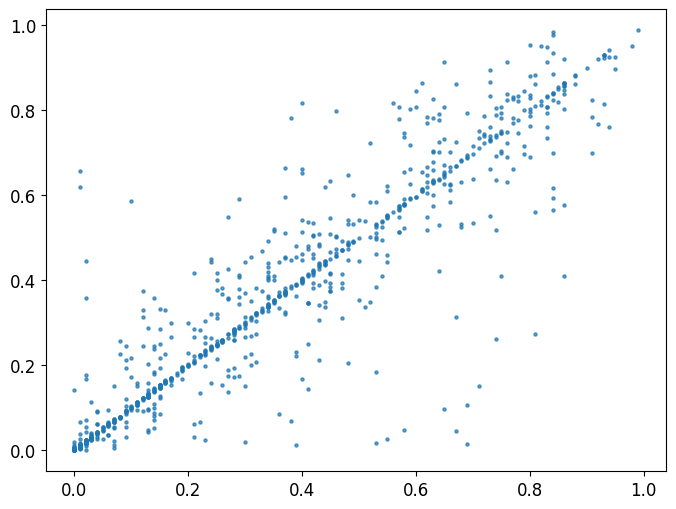

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(df_similar["YIELD"], df_query["YIELD"], alpha=0.7, s=5)
ax.set_xticklabels([f"{i:.1f}" for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([f"{i:.1f}" for i in ax.get_yticks()], fontsize=12)

# Morgan fingerprint + UMAP

In [44]:
df_target = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_ord_test1/input_data.csv")
df_query = pd.read_csv("/data1/ReactionT5_neword/task_yield/output_test1_test/input_data.csv")
df_target["input"] = df_target["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace("PRODUCT:", ".").replace(". ", ""))
df_query["input"] = df_query["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace("PRODUCT:", ".").replace(". ", ""))

In [46]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
# silence warning
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')

target_fp = []
query_fp = []
for smiles in df_target["input"]:
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
    target_fp.append(fp)
for smiles in df_query["input"]:
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
    query_fp.append(fp)

In [49]:
umap = UMAP(n_components=2)
target_embedding_umap = umap.fit_transform(target_fp)
save_pickle("/data1/ReactionT5_neword/task_yield/output_ord_test1/umap_full_morgan.pkl", umap)

np.save("/data1/ReactionT5_neword/task_yield/output_ord_test1/embedding_umap_full_morgan.npy", target_embedding_umap)
query_embedding_umap = umap.transform(query_fp)
np.save("/data1/ReactionT5_neword/task_yield/output_test1_test/query_embedding_umap_full_morgan.npy", query_embedding_umap)

similar_reactions = []
for i in range(len(query_embedding_umap)):
    mse_distance = []
    for j in range(len(target_embedding_umap)):
        mse_distance.append(np.linalg.norm(query_embedding_umap[i] - target_embedding_umap[j]))
    similar_reactions.append(np.argmin(mse_distance))

similar_reactions = np.array(similar_reactions)
np.save("/data1/ReactionT5_neword/task_yield/output_test1_test/similar_reactions_index_morgan_umap.npy", similar_reactions)

In [50]:
df_similar = df_target.iloc[similar_reactions].reset_index(drop=True)
print(len(df_similar), len(df_query))
r2_score(df_similar["YIELD"], df_query["YIELD"]), mean_squared_error(df_similar["YIELD"], df_query["YIELD"], squared=False)

898 898


/home/sagawa/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(-0.3260717802439246, 0.31688672606914703)

/tmp/ipykernel_396282/2748337034.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i:.1f}" for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_396282/2748337034.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{i:.1f}" for i in ax.get_yticks()], fontsize=12)


[Text(0, -0.2, '-0.2'),
 Text(0, 0.0, '0.0'),
 Text(0, 0.2, '0.2'),
 Text(0, 0.4000000000000001, '0.4'),
 Text(0, 0.6000000000000001, '0.6'),
 Text(0, 0.8, '0.8'),
 Text(0, 1.0000000000000002, '1.0'),
 Text(0, 1.2000000000000002, '1.2')]

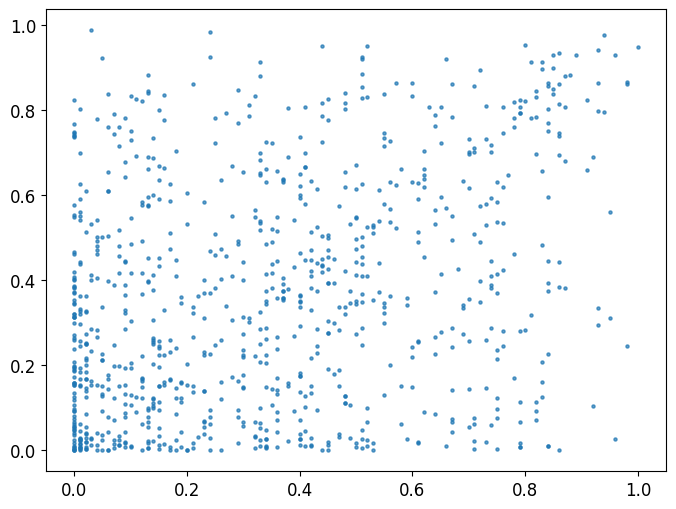

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(df_similar["YIELD"], df_query["YIELD"], alpha=0.7, s=5)
ax.set_xticklabels([f"{i:.1f}" for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([f"{i:.1f}" for i in ax.get_yticks()], fontsize=12)